In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
from statsmodels.stats.weightstats import DescrStatsW

In [5]:
emicron_m = pd.read_csv("D:/jupyter/dane/datos_crudos/emicron_moviles.csv")
emicron_22 = pd.read_csv("D:/jupyter/dane/datos_crudos/emicron_22.csv")

In [6]:
emicron_m = emicron_m.rename(columns = lambda x: x.lower())
emicron_22 = emicron_22.rename(columns = lambda x: x.lower())

In [7]:
emicron_m22 = emicron_m[emicron_m['ola'] == 2022]
emicron_m22 = emicron_m22.drop(columns = 'ola')
emicron_m22.columns
emicron_22.columns

Index(['directorio', 'secuencia_p', 'secuencia_encuesta', 'cod_depto', 'area',
       'clase_te', 'p35', 'p241', 'mes_ref', 'p3031',
       ...
       'p3014', 'p1573_1', 'p1573_2', 'p1573_3', 'p1573_4', 'p1573_5',
       'p1573_6', 'p1574', 'p1771', 'ola'],
      dtype='object', length=194)

In [8]:
emicron_m = pd.merge(emicron_m22, emicron_22[['id', 'grupos12']], on = 'id')
emicron_m.columns

Index(['id', 'ventas_mes_anterior', 'pottot', 'remuneracion_total', 'cyg',
       'cod_depto', 'cpam', 'grupos4', 'anos_espacio', 'f_exp', 'grupos12'],
      dtype='object')

In [9]:
# Definición labels
dic_depto = {5:"Antioquia",8:"Atlántico", 11:"Bogotá, D. C.",13:"Bolívar",15:"Boyacá",17:"Caldas", 18:"Caquetá",
             19:"Cauca", 20:"Cesar", 23:"Córdoba",25:"Cundinamarca", 27:"Chocó", 41:"Huila", 44:"La Guajira", 47:"Magdalena",
             50:"Meta", 52:"Nariño", 54:"Norte De Santander", 63:"Quindío", 66:"Risaralda", 68:"Santander", 70:"Sucre", 73:"Tolima",
             76:"Valle Del Cauca", 88:"San Andrés"}

dic_sector = {2:"Industria", 3:"Comercio", 4:"Servicios"}

dic_rut = {1:"Sí", 0:"No"}

dic_g12 = {3:"Industria",
           4:"Construcción",
           5:"Comercio",
           6:"Transporte y almacenamiento",
           7:"Alojamiento/servicios de comida",
           8:"Información y comunicaciones",
           9:"Actividades inmobiliarias",
           10:"Educación",
           11:"Actividades de salud humana",
           12:"Actividades artiísticas",
}

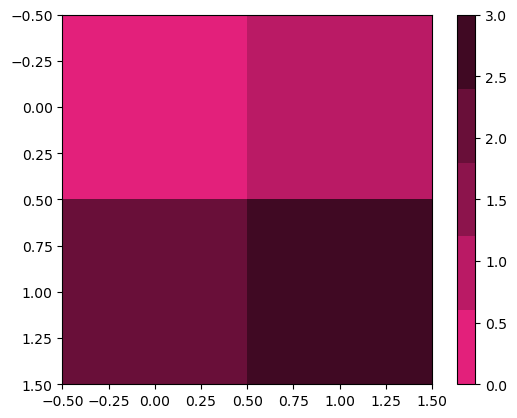

In [10]:
# Definiendo rampa de colores de acuerdo con imágen institucional

def create_custom_cmap(colors):
    cmap = ListedColormap(colors)
    return cmap

# Define los colores para el mapa de colores
colors = ['#E3207B', '#BA1A65', '#8C144C', '#690F39', '#400923']  # Rampa de colores que incluye 
colors2 = ['#E3207B', '#BA1A65', '#8C144C', '#690F39']  # Rampa de colores
# Creando el mapa de colores personalizado
custom_cmap = create_custom_cmap(colors) 
custom_cmap2 = create_custom_cmap(colors2) # no incluye el último color negro

# Grafica de ejemplo utilizando el mapa de colores personalizado
plt.imshow([[0, 1], [2, 3]], cmap = custom_cmap)
plt.colorbar()
plt.show()

# Sector económico

In [11]:
crosstab_proporcion = pd.crosstab(emicron_m['cod_depto'], 
                                  emicron_m['grupos4'],  
                                  emicron_m['f_exp'], #aplicando el factor de expansión
                                  aggfunc = 'sum', # aplicando la forma en que opera dicho factor de expansión
                                  normalize = "index")

crosstab_proporcion = crosstab_proporcion[[3, 4, 2]]

crosstab_proporcion = crosstab_proporcion.sort_values(by = 3, ascending = False)

crosstab_proporcion.rename(columns = dic_sector, inplace = True)
crosstab_proporcion.rename(index = dic_depto, inplace = True)
crosstab_proporcion

grupos4,Comercio,Servicios,Industria
cod_depto,,,
"Bogotá, D. C.",0.759996,0.225877,0.014127
Caldas,0.665965,0.282359,0.051676
Norte De Santander,0.639997,0.360003,0.000000
Atlántico,0.550761,0.436776,0.012463
Tolima,0.525812,0.428303,0.045885
Cundinamarca,0.506383,0.493617,0.000000
Magdalena,0.498060,0.467453,0.034487
Bolívar,0.496335,0.463104,0.040561
Santander,0.487042,0.491511,0.021447


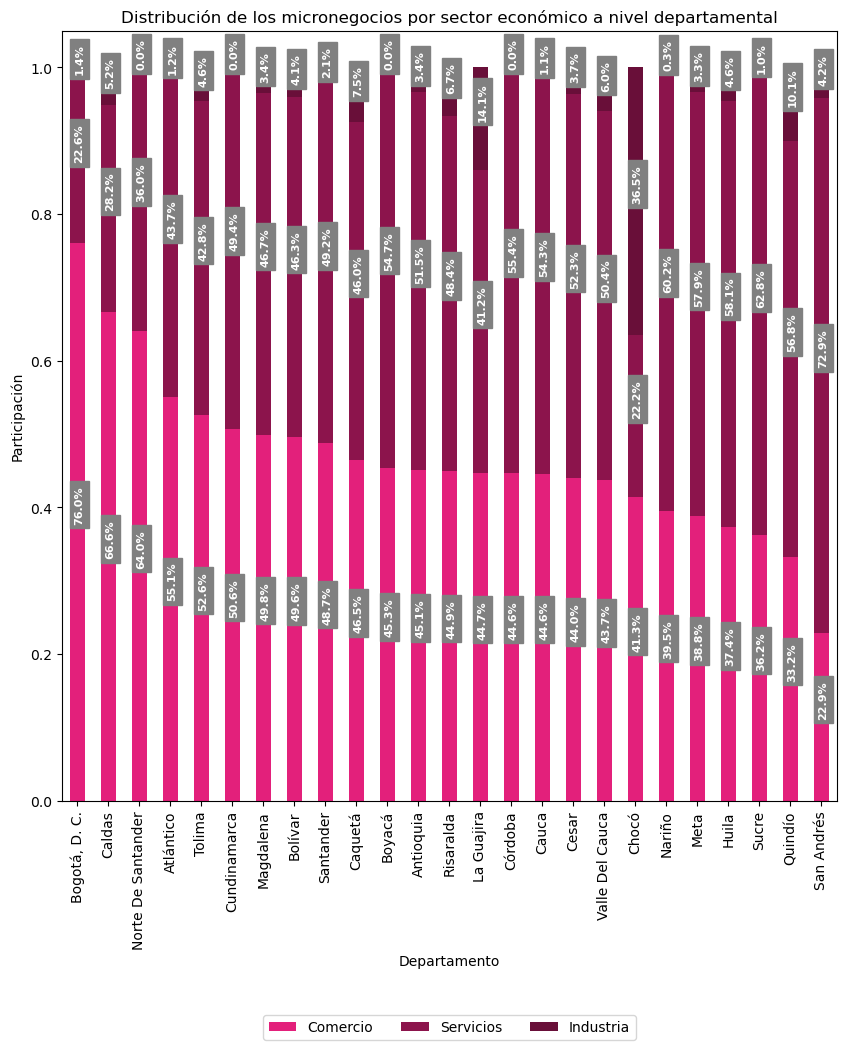

In [17]:
fig = crosstab_proporcion.plot.bar(stacked = True, 
                            colormap = custom_cmap2,
                            figsize = (10, 10)).get_figure()# para guardar una imagen



for n, x in enumerate([*crosstab_proporcion.index.values]):
    for (proportion, y_loc) in zip(crosstab_proporcion.loc[x],
                                   crosstab_proporcion.loc[x].cumsum()):
                
        plt.text(x = n - 0.1,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "white",
                 backgroundcolor = 'gray',
                 fontweight = 'bold',
                 fontsize = 8,
                 rotation = 'vertical')
                 #fontweight="bold")

plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("Distribución de los micronegocios por sector económico a nivel departamental")
        
# Put a legend below current axis
plt.legend(loc ='lower center', bbox_to_anchor = (0.5, -0.32),
          fancybox = True, shadow = False, ncol = 5)

plt.show()

In [264]:
fig.savefig("D:/jupyter/dane/imagenes/moviles_distribucion_negocios_sect_dpto.png")

In [11]:
y_loc

1.0

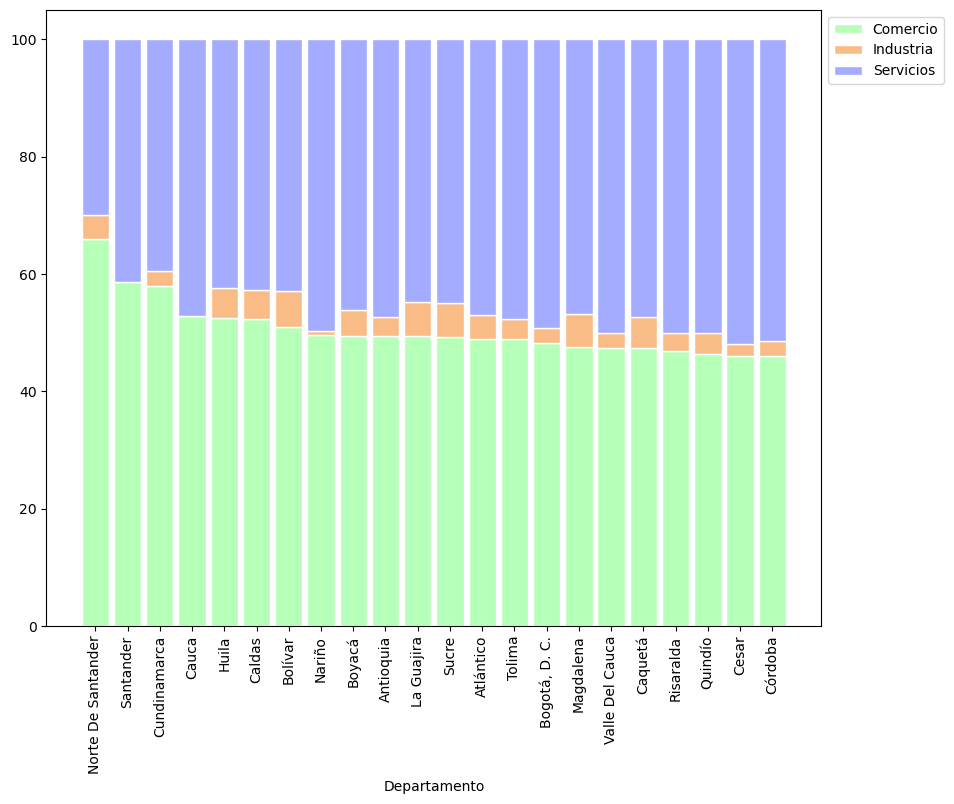

In [12]:
# From raw value to percentage
x = crosstab_proporcion.index
total = [i + j + k for i, j, k in zip(crosstab_proporcion['Comercio'], crosstab_proporcion['Industria'], crosstab_proporcion['Servicios'])]
comercio = [i / j * 100 for i, j in zip(crosstab_proporcion['Comercio'], total)]
industria = [i / j * 100 for i, j in zip(crosstab_proporcion['Industria'], total)]
servicios = [i / j * 100 for i, j in zip(crosstab_proporcion['Servicios'], total)]
 
# plot
barWidth = 0.85
nombres_dpto = crosstab_proporcion.index

fig = plt.figure(figsize = [10,8])

# Create green Bars
plt.bar(x, comercio, color='#b5ffb9', edgecolor='white', width = barWidth, label = 'Comercio')
# Create orange Bars
plt.bar(x, industria, bottom = comercio, color ='#f9bc86', edgecolor = 'white', width=barWidth, label = 'Industria')
# Create blue Bars
plt.bar(x, servicios, bottom = [i+j for i,j in zip(comercio, industria)], color = '#a3acff', edgecolor ='white', width = barWidth,label = 'Servicios')
 
# Custom x axis
plt.xticks(x, nombres_dpto, rotation = 90)
plt.xlabel("Departamento")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1), ncol = 1)

# Show graphic
plt.show()

# Ingresos

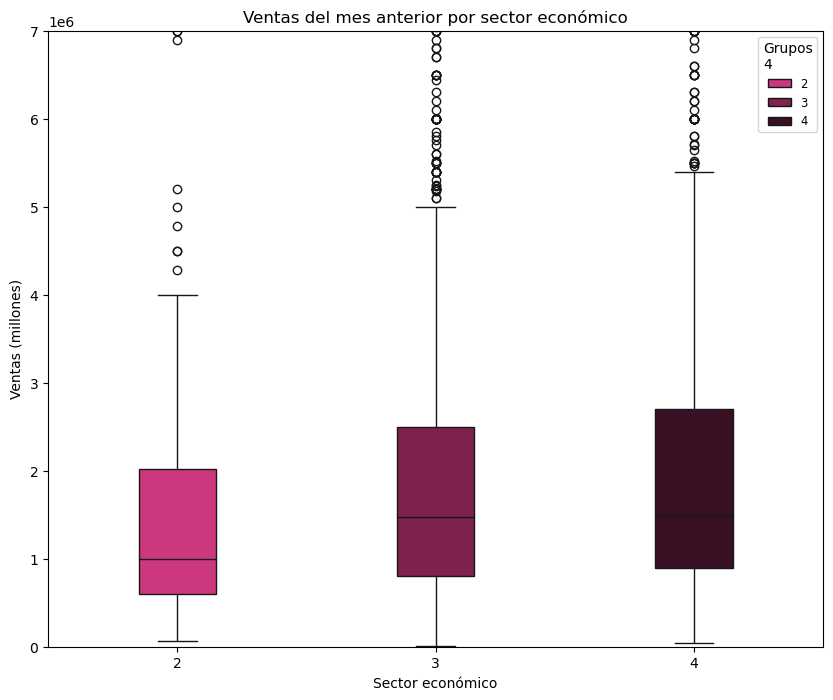

In [35]:
fig = plt.figure(figsize = [10, 8])
sns.boxplot(x = 'grupos4', y = 'ventas_mes_anterior', data = emicron_m, palette = custom_cmap, hue = 'grupos4', width = 0.3)
plt.title("Ventas del mes anterior por sector económico")
plt.ylabel("Ventas (millones)")
plt.xlabel("Sector económico")
# q1, q3 = emicron_m22['ventas_mes_anterior'].describe()[[4,6]]
# plt.ylim((0, q3 + 1.5*(q3-q1)))
plt.ylim(0, 7000000)
plt.legend(loc = 'upper right', title = 'Grupos\n4', fontsize = 'small')
plt.show()


In [274]:
fig.savefig("D:/jupyter/dane/imagenes/moviles_ventas_mes_anterior.png")

In [281]:
# Ventas mensuales
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['ventas_mes_anterior'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_ventas_sector.xlsx")

                Comercio     Servicios     Industria
Promedio    2.257892e+06  2.143475e+06  2.657436e+06
Desviacion  2.835271e+06  2.519802e+06  3.038602e+06
Minimo      1.200000e+04  4.000000e+04  6.000000e+04
1 cuartil   8.000000e+05  8.400000e+05  7.500000e+05
Mediana     1.500000e+06  1.500000e+06  1.500000e+06
3 cuartil   2.500000e+06  2.500000e+06  4.000000e+06
Maximo      3.040000e+07  3.000000e+07  1.400000e+07


# Ventas vs Costos y Gastos

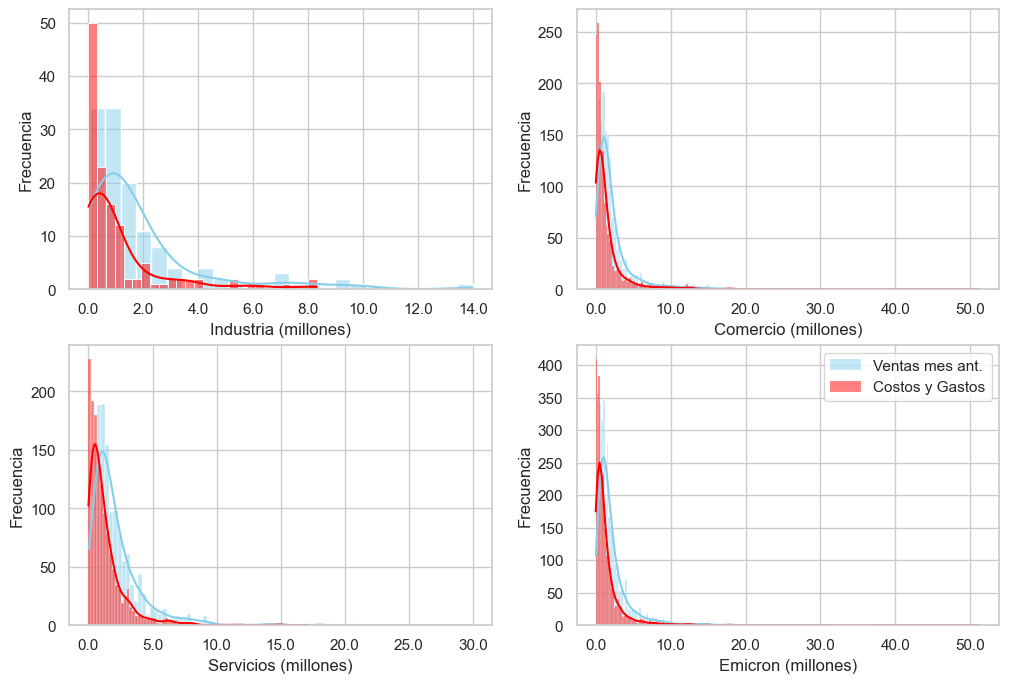

In [256]:
def formato_custom_x(x, pos):
    x_scaled = x / 1000000  # Escalando el valor de x multiplicándolo por 10
    return "{:.1f}".format(x_scaled)



sns.set_theme(style = "whitegrid", palette = "pastel")
fig, ax = plt.subplots(2, 2, figsize = (12, 8)) 

sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 2], x = 'ventas_mes_anterior', color = 'skyblue', label = "Ventas industria", kde = True, ax = ax[0,0])
sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 2], x = 'cyg', color = "red", label = "Costos y Gastos comercio", kde = True, ax = ax[0,0])
ax[0,0].set_xlabel("Industria (millones)", )
ax[0,0].set_ylabel("Frecuencia")
formato_x = ticker.FuncFormatter(formato_custom_x)
ax[0,0].xaxis.set_major_formatter(formato_x)


sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 3], x = 'ventas_mes_anterior', color = "skyblue", label = "Ventas comercio", kde = True, ax = ax[0,1])
sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 3], x = 'cyg', color = "red", label = "Costos y Gastos comercio", kde = True, ax = ax[0,1])
ax[0,1].set_xlabel("Comercio (millones)")
ax[0,1].set_ylabel("Frecuencia")
formato_x = ticker.FuncFormatter(formato_custom_x)
ax[0,1].xaxis.set_major_formatter(formato_x)


sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 4], x = 'ventas_mes_anterior', color = "skyblue", label = "Ventas servicios", kde=True, ax = ax[1,0])
sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']][emicron_m['grupos4'] == 4], x = 'cyg', color = "red", label = "Costos y Gastos servicios", kde = True, ax = ax[1,0])
ax[1,0].set_xlabel("Servicios (millones)")
ax[1,0].set_ylabel("Frecuencia")
formato_x = ticker.FuncFormatter(formato_custom_x)
ax[1,0].xaxis.set_major_formatter(formato_x)


sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']], x = 'ventas_mes_anterior', color = "skyblue", label = "Ventas mes ant.", kde = True, ax = ax[1,1])
sns.histplot(data = emicron_m[['ventas_mes_anterior', 'cyg']], x = 'cyg', color = "red", label = "Costos y Gastos", kde = True, ax = ax[1,1])
ax[1,1].set_xlabel("Emicron (millones)")
ax[1,1].set_ylabel("Frecuencia")
formato_x = ticker.FuncFormatter(formato_custom_x)
ax[1,1].xaxis.set_major_formatter(formato_x)


ylabel = ('')

plt.legend()
plt.show()

In [84]:
fig.savefig("D:/jupyter/dane/imagenes/ventas_vs_cyg.png")

In [282]:
# Costos y gastos
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['cyg'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_cyg_sector.xlsx")

                Comercio     Servicios     Industria
Promedio    1.496776e+06  1.350975e+06  1.570861e+06
Desviacion  2.503694e+06  1.784753e+06  2.055527e+06
Minimo      0.000000e+00  0.000000e+00  0.000000e+00
1 cuartil   3.040000e+05  4.000000e+05  3.100000e+05
Mediana     7.300000e+05  8.460000e+05  7.000000e+05
3 cuartil   1.560869e+06  1.590000e+06  2.200000e+06
Maximo      5.130600e+07  1.715000e+07  8.320000e+06


In [283]:
# remuneración
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['remuneracion_total'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_remuneracion_sector.xlsx")

                Comercio     Servicios     Industria
Promedio    5.718845e+04  5.597257e+04  8.965427e+04
Desviacion  9.604231e+05  2.526324e+05  2.446409e+05
Minimo      0.000000e+00  0.000000e+00  0.000000e+00
1 cuartil   0.000000e+00  0.000000e+00  0.000000e+00
Mediana     0.000000e+00  0.000000e+00  0.000000e+00
3 cuartil   0.000000e+00  0.000000e+00  0.000000e+00
Maximo      3.019411e+07  7.385000e+06  1.200000e+06


In [285]:
descriptions = {}

for est in emicron_m['grupos4'].unique():
    descriptions[est] = emicron_m['remuneracion_total'][emicron_m['grupos4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

           Comercio     Servicios     Industria
count  1.523000e+03  1.406000e+03  1.270000e+02
mean   4.497503e+04  6.201081e+04  4.047056e+04
std    7.936530e+05  3.195488e+05  1.652776e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00
max    3.019411e+07  7.385000e+06  1.200000e+06


## Valor agregado

In [287]:
emicron_m['va'] = emicron_m['ventas_mes_anterior'] - emicron_m['cyg']
emicron_m['va_rel'] = emicron_m['va'] / emicron_m['ventas_mes_anterior']
emicron_m['va_pro'] = emicron_m['va'] / (emicron_m['cyg']+1)

In [288]:
# Valor agregado va
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['va'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_va_sector.xlsx")

                Comercio     Servicios     Industria
Promedio    7.611159e+05  7.925001e+05  1.086575e+06
Desviacion  9.142633e+05  1.300843e+06  1.141843e+06
Minimo     -4.620600e+07 -1.160000e+07 -1.900000e+06
1 cuartil   3.423790e+05  3.500000e+05  4.000000e+05
Mediana     6.000000e+05  6.000000e+05  7.600000e+05
3 cuartil   1.000000e+06  9.640000e+05  1.544000e+06
Maximo      1.680000e+07  1.705667e+07  5.680000e+06


In [295]:
# Valor agregado rel
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['va_rel'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_va_rel_sector.xlsx")

            Comercio  Servicios  Industria
Promedio    0.436456   0.400361   0.507922
Desviacion  0.278858   0.463399   0.324747
Minimo     -9.060000 -11.362080  -4.446268
1 cuartil   0.272727   0.298507   0.357895
Mediana     0.428571   0.410000   0.500000
3 cuartil   0.580000   0.545455   0.625234
Maximo      1.000000   1.000000   1.000000


In [296]:
# Valor agregado pro
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['va_pro'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_va_pro_sector.xlsx")

                Comercio     Servicios     Industria
Promedio    1.330169e+04  1.094492e+04  3.783133e+04
Desviacion  1.270504e+05  1.085696e+05  1.808810e+05
Minimo     -9.005964e-01 -9.191070e-01 -8.163875e-01
1 cuartil   3.749998e-01  4.255315e-01  5.573770e-01
Mediana     7.499963e-01  6.949145e-01  9.999975e-01
3 cuartil   1.380950e+00  1.199998e+00  1.668325e+00
Maximo      2.995294e+06  2.000000e+06  1.800000e+06


# Costos sobre ventas

In [290]:
emicron_m['coef_g'] = emicron_m['cyg'] / emicron_m['ventas_mes_anterior']

In [298]:
# Costos sobre ventas - coeficiente
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['coef_g'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_costos_sobre_ventas_sector.xlsx")

             Comercio  Servicios  Industria
Promedio     0.563544   0.599639   0.492078
Desviacion   0.278858   0.463399   0.324747
Minimo       0.000000   0.000000   0.000000
1 cuartil    0.420000   0.454545   0.374766
Mediana      0.571429   0.590000   0.500000
3 cuartil    0.727273   0.701493   0.642105
Maximo      10.060000  12.362080   5.446268


# Personal ocupado

In [138]:
emicron_m['anos_espacio'].unique()

array([5, 1, 2, 3, 4], dtype=int64)

In [18]:
crosstab_pottot_actividad = pd.crosstab(emicron_m['pottot'], 
                                        emicron_m['grupos4'], 
                                        emicron_m['f_exp'], #aplicando el factor de expansión
                                        aggfunc = "mean", # aplicando la forma en que opera dicho factor de expansión
                                        colnames = ["Actividad"],
                                        rownames = ["Personal ocupado"],
                                        normalize = 1)

In [19]:

crosstab_pottot_actividad = crosstab_pottot_actividad.rename(columns = {2: 'Industria',
                                                                        3:'Comercio',
                                                                        4: 'Servicios'})

In [20]:
crosstab_pottot_actividad = crosstab_pottot_actividad.fillna(0)

In [21]:
crosstab_pottot_actividad

Actividad,Industria,Comercio,Servicios
Personal ocupado,,,
0.0,0.286336,0.162893,0.232556
1.0,0.324998,0.184141,0.252559
2.0,0.388666,0.128249,0.219344
3.0,0.000000,0.138794,0.226875
4.0,0.000000,0.385924,0.068667


In [31]:
crosstab_pottot_actividad['Empleados'] = crosstab_pottot_actividad.index

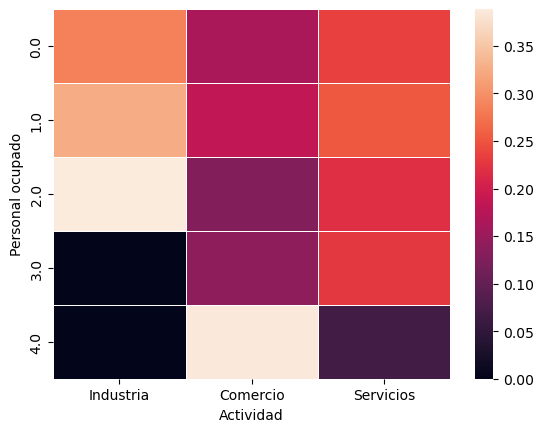

In [22]:
ax = sns.heatmap(crosstab_pottot_actividad, linewidths = 0.5, linecolor = 'white')

In [137]:
ax.figure.savefig("D:/jupyter/dane/imagenes/personal_ocupado_actividad.png")

Text(0.5, 0, 'Número de empleados')

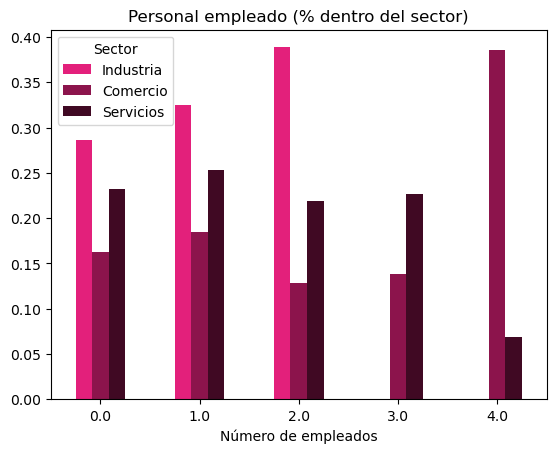

In [34]:
crosstab_pottot_actividad.plot(x = 'Empleados', y = ['Industria', 'Comercio', 'Servicios'], kind="bar", rot=0, cmap = custom_cmap)
plt.legend().set_title("Sector")
plt.title("Personal empleado (% dentro del sector)")
plt.xlabel("Número de empleados")

In [292]:
# Personal ocupado
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['pottot'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_costos_pottot_sector.xlsx")

            Comercio  Servicios  Industria
Promedio    0.142227   0.320935   0.259144
Desviacion  0.410179   0.574946   0.543590
Minimo      0.000000   0.000000   0.000000
1 cuartil   0.000000   0.000000   0.000000
Mediana     0.000000   0.000000   0.000000
3 cuartil   0.000000   1.000000   0.000000
Maximo      4.000000   4.000000   2.000000


In [175]:
emicron_m['anos_espacio'].unique()

array([5, 1, 2, 3, 4], dtype=int64)

# Años espacio público

In [226]:
crosstab_anosesp_actividad=pd.crosstab(emicron_m['anos_espacio'],
                                       emicron_m['grupos4'],
                                       emicron_m['f_exp'],
                                       aggfunc = 'sum',
                                       colnames = ['Sector económico'],
                                       rownames = ['Años espacio publico'],
                                       normalize = False)

In [230]:
crosstab_anosesp_actividad = crosstab_anosesp_actividad.rename(columns = {2: 'Industria',
                                             3: 'Comercio',
                                             4: 'Servcios'})

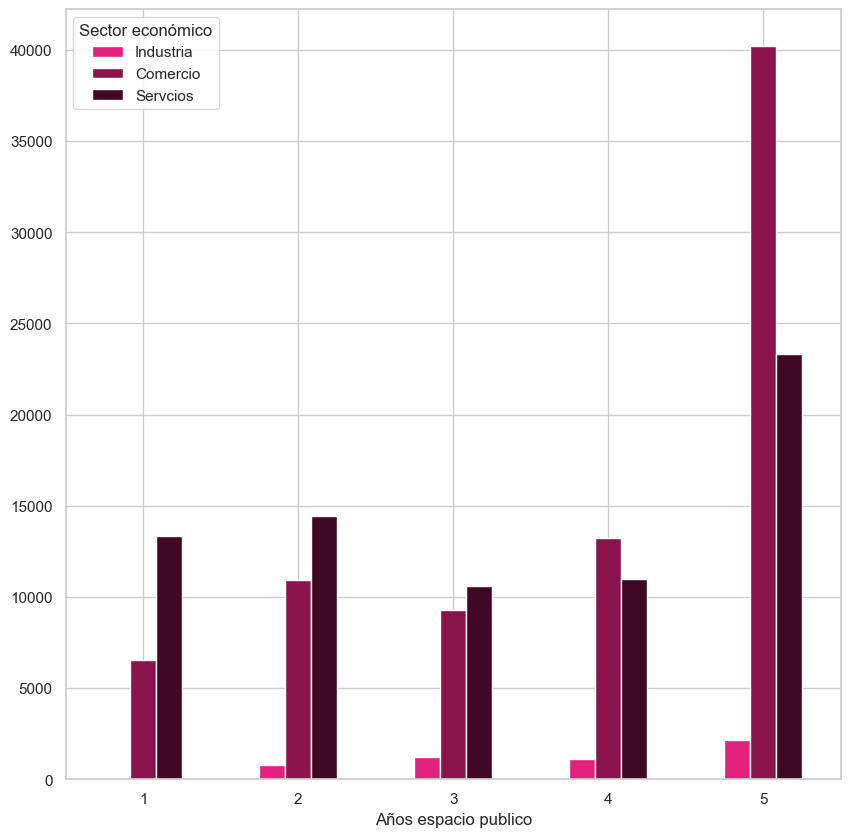

In [261]:
fig = crosstab_anosesp_actividad.plot.bar(rot = 0,
                                          colormap = custom_cmap,
                                          figsize = (10, 10),
                                         ).get_figure()# para guardar una imagen

In [262]:
fig.savefig("D:/jupyter/dane/imagenes/anos_espacio_sect_economico.png")

In [293]:
descriptions = {}

for est in emicron_m['grupos4'].unique():
    dwf = DescrStatsW(emicron_m['anos_espacio'][emicron_m['grupos4'] == est], weights = emicron_m['f_exp'][emicron_m['grupos4'] == est], ddof = 1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns = dic_sector, inplace = True)
print(descriptions_df)

descriptions_df.to_excel("D:/jupyter/dane/datos_intermedios/tablas_anos_espacio_sector.xlsx")

            Comercio  Servicios  Industria
Promedio    3.868099   3.228298   3.870473
Desviacion  1.371097   1.521565   1.112284
Minimo      1.000000   1.000000   1.000000
1 cuartil   3.000000   2.000000   3.000000
Mediana     5.000000   3.000000   4.000000
3 cuartil   5.000000   5.000000   5.000000
Maximo      5.000000   5.000000   5.000000
